## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Fetching Data

We use Apple's daily stock data for the past 10 years from NASDAQ

In [18]:
# Load Data
data = pd.read_csv("AAPL.csv", parse_dates=["Date"])
data = data.rename(columns={
    "Date": "Date",
    "Close/Last": "Close",
    "Open": "Open",
    "High": "High",
    "Low": "Low",
    "Volume": "Volume"
})

# Remove Dollar Sign And Affirm Data Types
for col in ["Close", "Open", "High", "Low"]:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Sort By Date
data = data.sort_values("Date").set_index("Date")

data.head(5)


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_w/0pnm_dcj0fd49k2kldh3bc5h0000gn/T/ipykernel_1215/3179318868.py:14: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)


,Close,Volume,Open,High,Low
Date,,,,,
2015-11-02,30.2950,128611480,29.9675,30.3400,29.9025
2015-11-03,30.6425,181917040,30.1975,30.8725,30.1750
2015-11-04,30.5000,179316240,30.7825,30.9550,30.4050
2015-11-05,30.2300,157933600,30.4625,30.6725,30.0450
2015-11-06,30.2650,132036440,30.2775,30.4525,30.1550


## Building Features

In [19]:
data['Return'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()
data['MA90'] = data['Close'].rolling(window=90).mean()
data['Volatility'] = data['Return'].rolling(window=30).std()
data['Momentum'] = data['Close'] - data['MA30']
data = data.dropna()

## Defining Target Variable

In [20]:
data['Target'] = data['Return'].shift(-1)
data = data.dropna()

## Spliting Data And Fiting The Model

In [21]:
# Defining Input And Output Variables
features = ['Return', 'MA10', 'MA30', 'MA90', 'Volatility', 'Momentum']
X = data[features]
y = data['Target']

# Spliting The Data To Test And Train Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fiting The Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.0008816155581142189
R²: -1.7709139777416185


## Visualisation

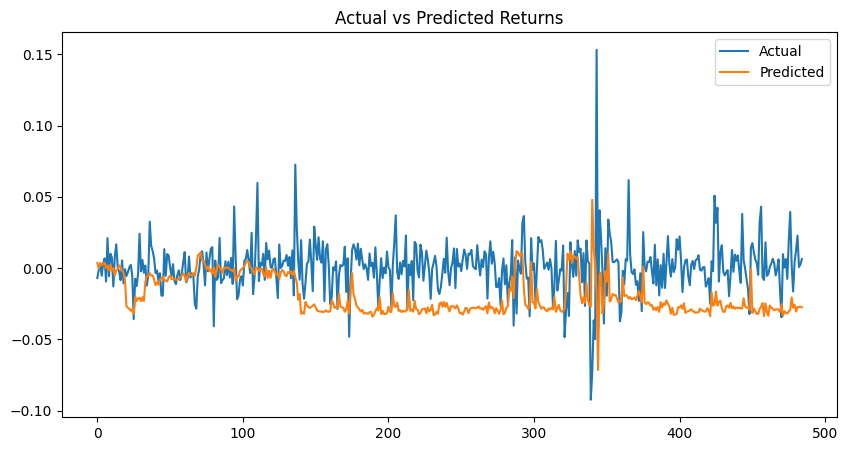

In [22]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.show()

## Interpretation

Because of the highly unpredictable nature of short term returns ( like daily returns that we used) of stocks, our model is producing more noise than actual results.

## How To Make It Work Better?

One approach can be expanding our desired period to weekly or monthly. This way we can get better results from our features beacause they are mostly good for capturing trends or risks which, are more visible over a month.

In [23]:
monthly = data.resample('M').last()  
monthly['Return'] = monthly['Close'].pct_change()


monthly['MA3'] = monthly['Close'].rolling(window=3).mean()   
monthly['MA6'] = monthly['Close'].rolling(window=6).mean()   
monthly['MA12'] = monthly['Close'].rolling(window=12).mean() 
monthly['Volatility'] = monthly['Return'].rolling(window=6).std()
monthly['Momentum'] = monthly['Close'] - monthly['MA6']


monthly['Target'] = monthly['Return'].shift(-1)

monthly = monthly.dropna()


/var/folders/_w/0pnm_dcj0fd49k2kldh3bc5h0000gn/T/ipykernel_1215/2476471834.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.resample('M').last()


In [24]:
features = ['Return', 'MA3', 'MA6', 'MA12', 'Volatility', 'Momentum']
X = monthly[features]
y = monthly['Target']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.004635140740275325
R² Score: -0.3139927981530708


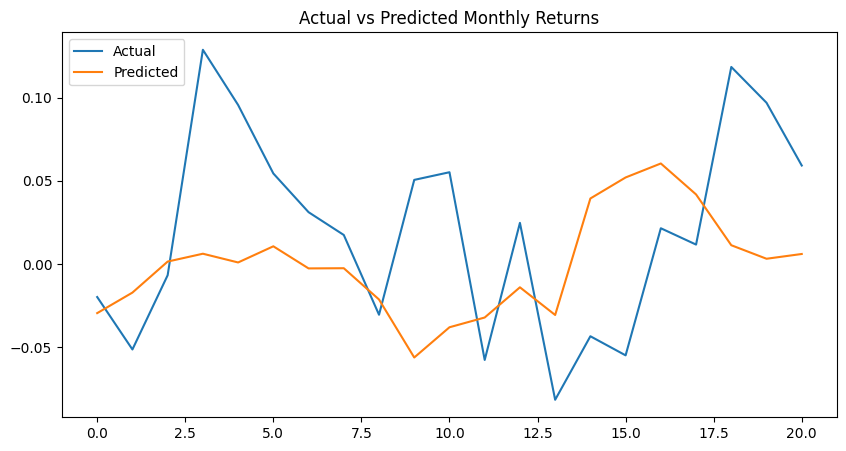

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Monthly Returns')
plt.legend()
plt.show()

In [36]:

# Load CSV
data = pd.read_csv("AAPL.csv", parse_dates=['Date'])

# Rename columns
data = data.rename(columns={
    'Close/Last':'Close',
    'Open':'Open',
    'High':'High',
    'Low':'Low',
    'Volume':'Volume'
})

# Remove any $ signs or commas and convert to float
for col in ['Close','Open','High','Low']:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Sort by date
data = data.sort_values('Date').set_index('Date')

# Resample monthly (month-end)
monthly = data.resample('ME').last()  # 'ME' = month end

# Create returns and features
monthly['Return'] = monthly['Close'].pct_change()
monthly['MA3'] = monthly['Close'].rolling(3).mean()
monthly['MA6'] = monthly['Close'].rolling(6).mean()
monthly['MA12'] = monthly['Close'].rolling(12).mean()
monthly['Volatility'] = monthly['Return'].rolling(6).std()
monthly['Momentum'] = monthly['Close'] - monthly['MA6']

# Target: next month up (1) or down (0)
monthly['Target'] = (monthly['Return'].shift(-1) > 0).astype(int)

# Drop NaN rows created by rolling/shift
monthly = monthly.dropna()

monthly.head(5)

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_w/0pnm_dcj0fd49k2kldh3bc5h0000gn/T/ipykernel_1215/2329487503.py:15: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)


,Close,Volume,Open,High,Low,Return,MA3,MA6,MA12,Volatility,Momentum,Target
Date,,,,,,,,,,,,
2016-10-31,28.3850,105515640,28.4125,28.5575,28.3000,0.004334,27.724167,26.348333,26.097500,0.049236,2.036667,0
2016-11-30,27.6300,144605800,27.9000,28.0500,27.5675,-0.026599,28.092500,26.792500,25.935417,0.051585,0.837500,1
2016-12-31,28.9550,122223600,29.1625,29.3000,28.8575,0.047955,28.323333,27.635000,26.155417,0.042733,1.320000,1
2017-01-31,30.3375,191071040,30.2875,30.3475,30.1550,0.047747,28.974167,28.349167,26.655625,0.034097,1.988333,1
2017-02-28,34.2475,93785360,34.2700,34.3588,34.1750,0.128883,31.180000,29.636250,27.495208,0.053390,4.611250,1


In [37]:
features = ['Return', 'MA3', 'MA6', 'MA12', 'Volatility', 'Momentum']
X = monthly[features]
y = monthly['Target']

In [38]:
# Use last 20% of data as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [40]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # probability of going up

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5454545454545454

Confusion Matrix:
[[ 9  0]
 [10  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         9
           1       1.00      0.23      0.38        13

    accuracy                           0.55        22
   macro avg       0.74      0.62      0.51        22
weighted avg       0.78      0.55      0.48        22



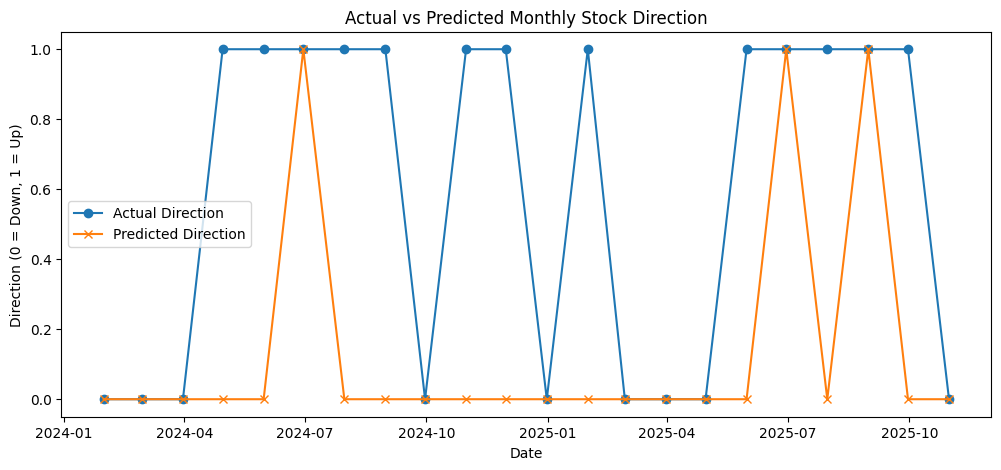

In [42]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual Direction', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Direction', marker='x')
plt.title('Actual vs Predicted Monthly Stock Direction')
plt.xlabel('Date')
plt.ylabel('Direction (0 = Down, 1 = Up)')
plt.legend()
plt.show()


In [43]:
# Load CSV
data = pd.read_csv("AAPL.csv", parse_dates=['Date'])
data = data.rename(columns={'Close/Last':'Close', 'Open':'Open', 'High':'High', 'Low':'Low', 'Volume':'Volume'})

# Convert numeric columns
for col in ['Close','Open','High','Low']:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Sort and resample monthly
data = data.sort_values('Date').set_index('Date')
monthly = data.resample('ME').last()

# Create stock features
monthly['Return'] = monthly['Close'].pct_change()
monthly['MA3'] = monthly['Close'].rolling(3).mean()
monthly['MA6'] = monthly['Close'].rolling(6).mean()
monthly['MA12'] = monthly['Close'].rolling(12).mean()
monthly['Volatility'] = monthly['Return'].rolling(6).std()
monthly['Momentum'] = monthly['Close'] - monthly['MA6']

# Target: next month up or down
monthly['Target'] = (monthly['Return'].shift(-1) > 0).astype(int)
monthly = monthly.dropna()


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_w/0pnm_dcj0fd49k2kldh3bc5h0000gn/T/ipykernel_1215/3527119829.py:7: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)


In [44]:
start = monthly.index.min()
end = monthly.index.max()

# S&P 500 Index (monthly)
sp500 = web.DataReader('SP500', 'fred', start, end)
sp500 = sp500.resample('M').last().pct_change().rename(columns={'SP500':'SP500_Return'})

# 10-Year Treasury Yield
treasury = web.DataReader('DGS10', 'fred', start, end)
treasury = treasury.resample('M').last().rename(columns={'DGS10':'10Y_Yield'})

# Merge macro features
monthly = monthly.merge(sp500, left_index=True, right_index=True, how='left')
monthly = monthly.merge(treasury, left_index=True, right_index=True, how='left')

# Drop any remaining NaNs
monthly = monthly.dropna()


/var/folders/_w/0pnm_dcj0fd49k2kldh3bc5h0000gn/T/ipykernel_1215/4008028413.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500 = sp500.resample('M').last().pct_change().rename(columns={'SP500':'SP500_Return'})
/var/folders/_w/0pnm_dcj0fd49k2kldh3bc5h0000gn/T/ipykernel_1215/4008028413.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  treasury = treasury.resample('M').last().rename(columns={'DGS10':'10Y_Yield'})


In [45]:
features = ['Return', 'MA3', 'MA6', 'MA12', 'Volatility', 'Momentum', 'SP500_Return', '10Y_Yield']
X = monthly[features]
y = monthly['Target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.45454545454545453

Confusion Matrix:
[[ 9  0]
 [12  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         9
           1       1.00      0.08      0.14        13

    accuracy                           0.45        22
   macro avg       0.71      0.54      0.37        22
weighted avg       0.77      0.45      0.33        22



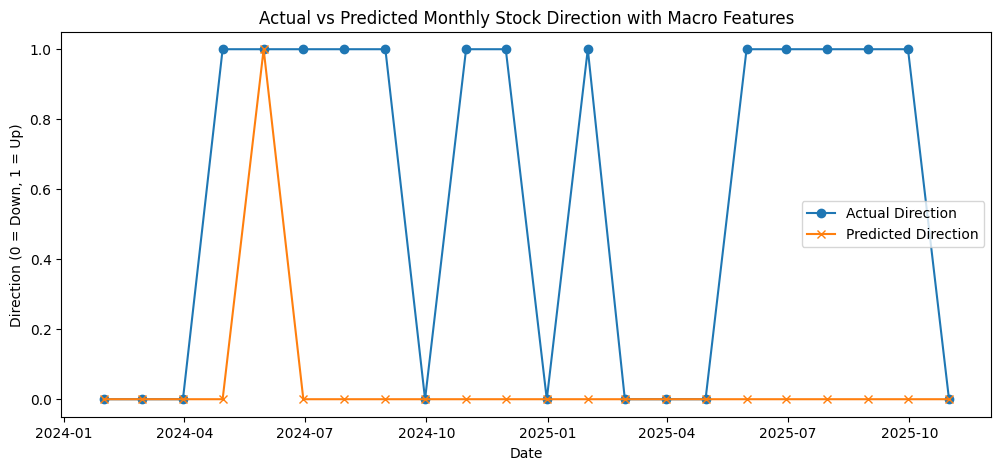

In [48]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual Direction', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Direction', marker='x')
plt.title('Actual vs Predicted Monthly Stock Direction with Macro Features')
plt.xlabel('Date')
plt.ylabel('Direction (0 = Down, 1 = Up)')
plt.legend()
plt.show()